<a href="https://colab.research.google.com/github/IsraaFahmy/Statistics-and-Data-Science-Micromasters-/blob/main/MITx%2018.6501x/Notebooks/stats_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing with R



#DATASETS:
subscriber_data - https://drive.google.com/file/d/1dMT4KPU5FxJjLsXZl8cRTDdY8jmxrQxE/view?usp=sharing

email_small - https://drive.google.com/file/d/1XfAts8TvnF48CZqjF9iKyL7Bq2Q7rSBN/view?usp=sharing

reading_protocol - https://drive.google.com/file/d/1wriN-af6SQFrAzczOqeu2VagS3wuEhal/view?usp=sharing

In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### Difference in Proportions

Visually assessing the difference in proportions is equivalent to looking at a bar plot.  To test the difference in proportions we use the `prop.test` function.  You can either enter the counts directly of use `xtabs` to create the cross-tabulated data from a DataFrame.  

In [ ]:
#dataframe with clicks
dataframe <-data.frame(page= c('original', 'new'), clicks=c(0.8, 0.82))
dataframe


page,clicks
<chr>,<dbl>
original,0.80
new,0.82


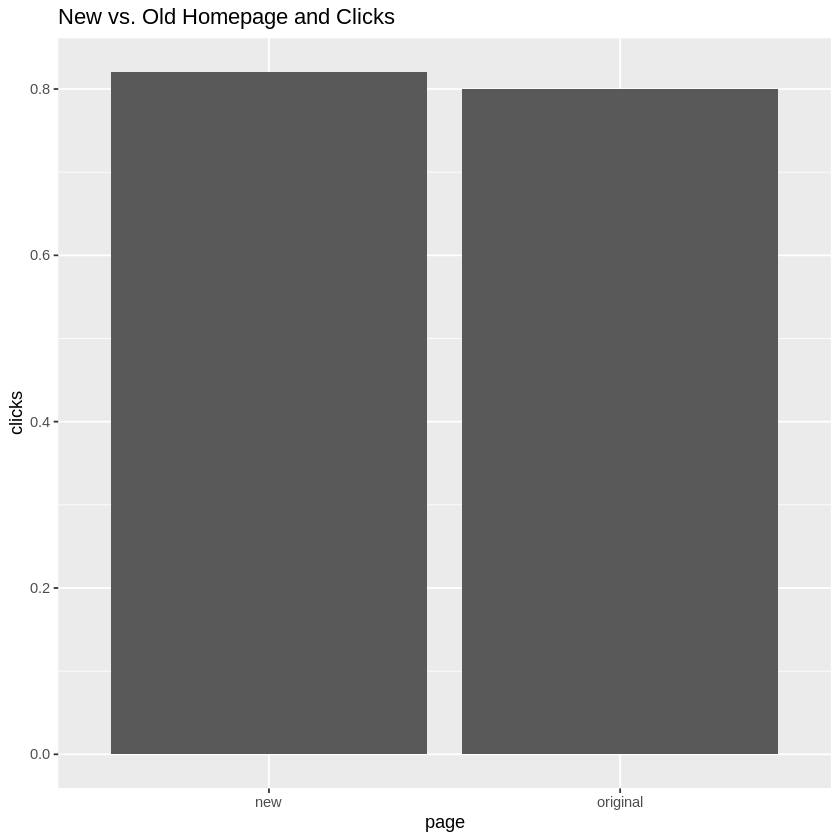

In [ ]:
#barplot of click rates
ggplot(dataframe, aes(x = page, y = clicks)) +
  geom_bar(stat = 'identity') +
  labs(title = 'New vs. Old Homepage and Clicks')

**Version 1**

| page | click  | total |
| ------ | ------- | ----- |
| Old | 400 | 500 |
| New | 410 | 500 |

**Version 2**

| page | click  | total |
| ------ | ------- | ----- |
| Old | 300 | 500 |
| New | 450 | 500 |

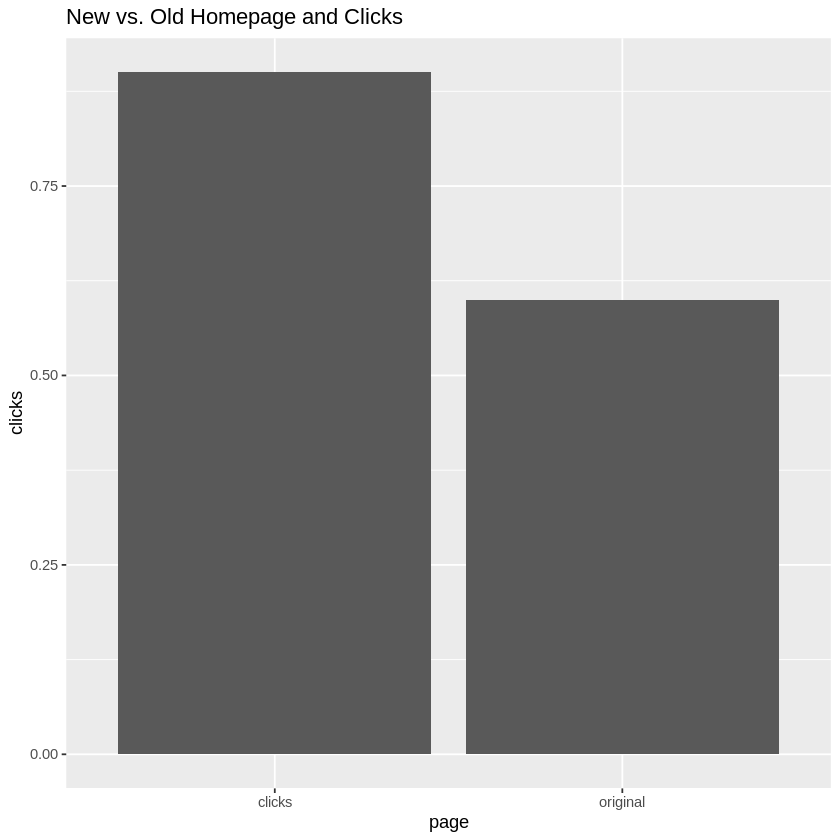

In [ ]:
df <- data.frame(page = c("original", "clicks"),
                 clicks = c(0.6, 0.9))


ggplot(df, aes(x = page, y = clicks)) +
  geom_bar(stat = 'identity') +
  labs(title = 'New vs. Old Homepage and Clicks')

### Datasets

- Load in data
- Explore features
- Opportunities for tests of proportions?

In [ ]:
# Load data from csv
email_data <- read_csv("email_small.csv")
subscriber_data <- read_csv("subscriber_data.csv")

Rows: 37196 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): cpgn_id, group
dbl (11): user_id, open, click, purch, chard, sav_blanc, syrah, cab, past_pu...
lgl  (1): email

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 300 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): gender, ownHome, subscribe, Segment
dbl (3): age, income, kids

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
glimpse(email_data)
#email_data

Rows: 37,196
Columns: 14
$ user_id    <dbl> 1058220, 1122167, 1003710, 1079666, 1100384, 1054148, 10657…
$ cpgn_id    <chr> "1901Email", "1901Email", "1901Email", "1901Email", "1901Em…
$ group      <chr> "email_B", "ctrl", "ctrl", "ctrl", "email_A", "ctrl", "emai…
$ email      <lgl> TRUE, FALSE, FALSE, FALSE, TRUE, FALSE, TRUE, TRUE, FALSE, …
$ open       <dbl> 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,…
$ click      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ purch      <dbl> 0.00, 0.00, 0.00, 0.00, 88.00, 0.00, 18.41, 0.00, 0.00, 0.0…
$ chard      <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 146.13, 0.00, 0.00, 112…
$ sav_blanc  <dbl> 0.00, 678.61, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.0…
$ syrah      <dbl> 0.00, 0.00, 0.00, 25.64, 0.00, 407.96, 0.00, 24.48, 0.00, 0…
$ cab        <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 15.81, 102.39, 13.13, 0…
$ past_purch <dbl> 0.00, 678.61, 0.00, 25.64, 0.00, 407.96, 161.94, 126.87, 13…
$ days_since <d

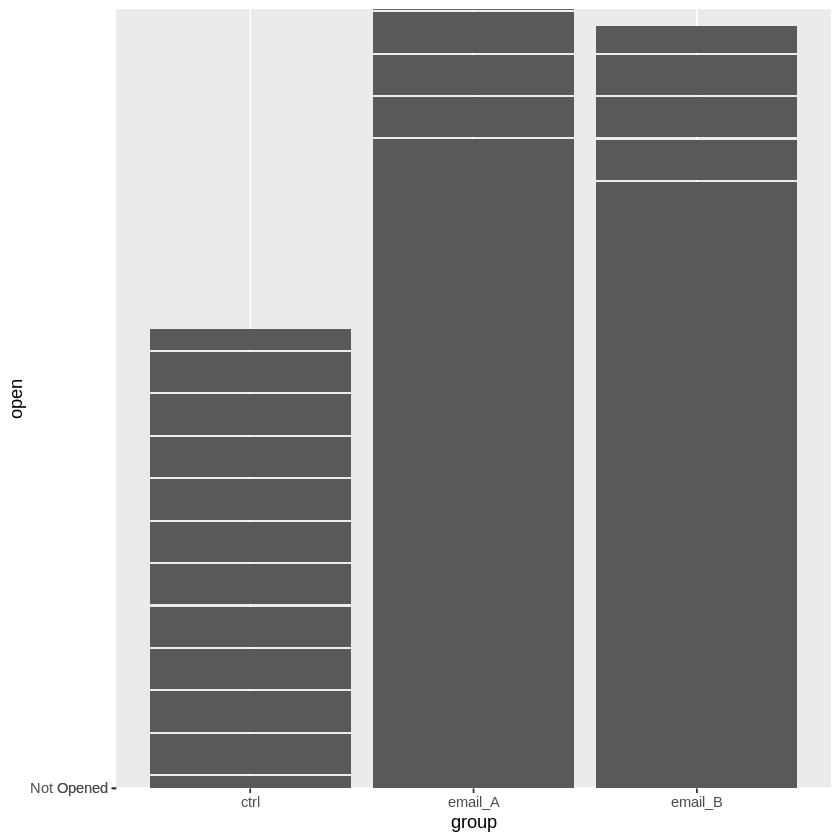

In [ ]:
ggplot(email_data, aes(x = group, y = open)) + geom_bar(stat = 'identity')

In [ ]:
glimpse(subscriber_data)

Rows: 300
Columns: 7
$ age       <dbl> 47.31613, 31.38684, 43.20034, 37.31700, 40.95439, 43.03387, …
$ gender    <chr> "Male", "Male", "Male", "Female", "Female", "Male", "Male", …
$ income    <dbl> 49482.81, 35546.29, 44169.19, 81041.99, 79353.01, 58143.36, …
$ kids      <dbl> 2, 1, 0, 1, 3, 4, 3, 0, 1, 0, 0, 0, 2, 3, 1, 3, 0, 0, 1, 2, …
$ ownHome   <chr> "ownNo", "ownYes", "ownYes", "ownNo", "ownYes", "ownYes", "o…
$ subscribe <chr> "subNo", "subNo", "subNo", "subNo", "subNo", "subNo", "subNo…
$ Segment   <chr> "Suburb mix", "Suburb mix", "Suburb mix", "Suburb mix", "Sub…


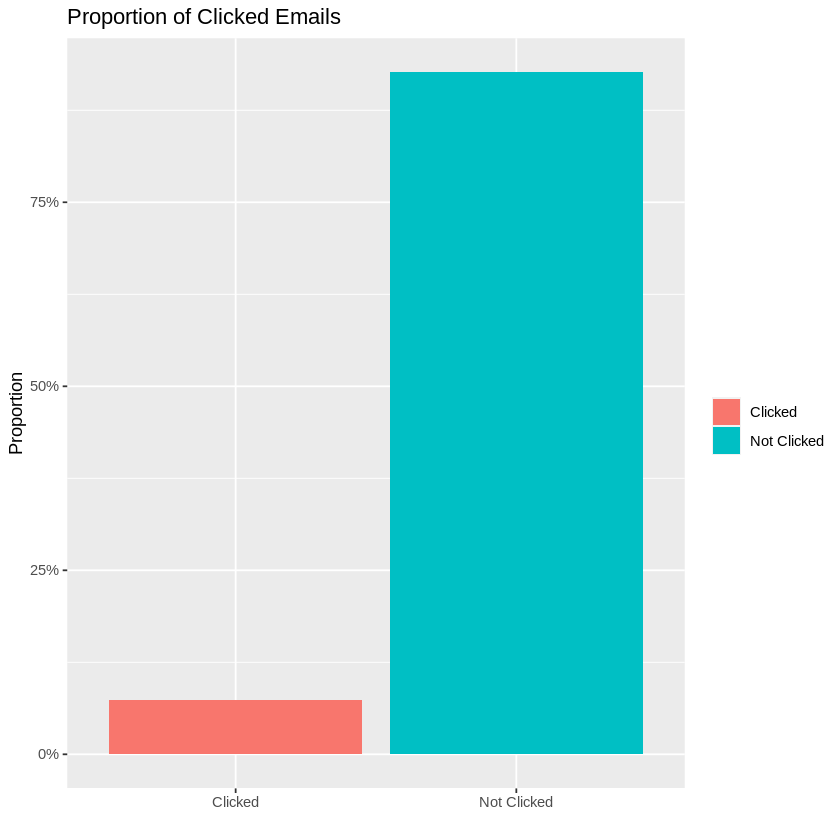

In [ ]:
email_data <- email_data %>%
  mutate(
    click = ifelse(click == 1, "Clicked", "Not Clicked"),
    open = ifelse(open == 1, "Opened", "Not Opened"),
    chard = ifelse(chard == 1, "Charded", "Not Charded")
  )

email_data %>% ggplot(aes(x = click, fill = click)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Proportion of Clicked Emails", y = "Proportion", x = "", fill = "")


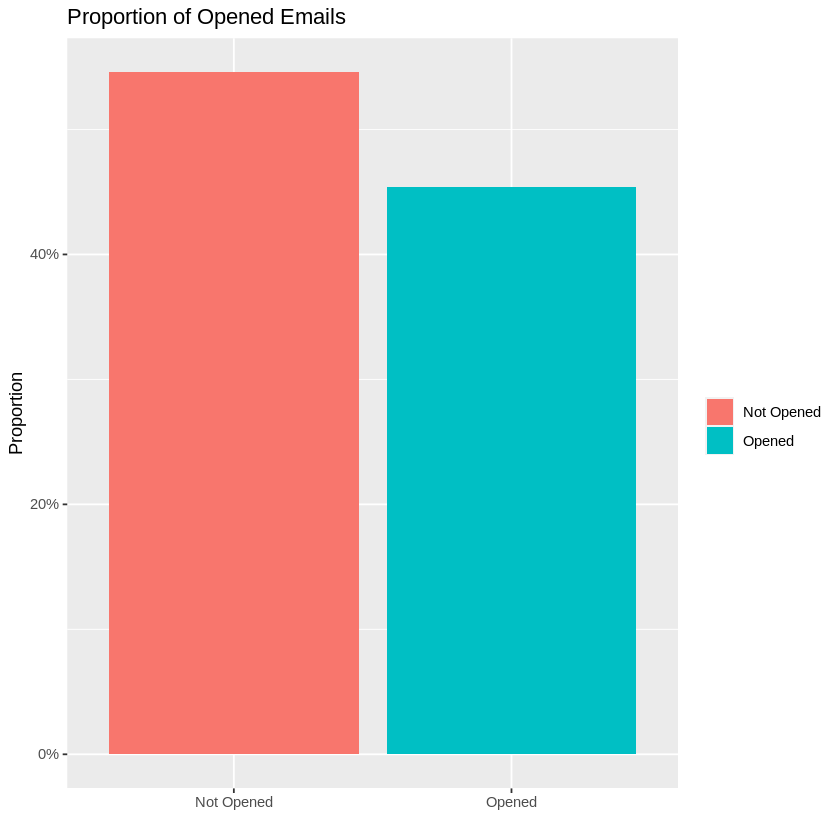

In [ ]:
# Plot proportion of opened emails
email_data %>%
  ggplot(aes(x = open, fill = open)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Proportion of Opened Emails", y = "Proportion", x = "", fill = "")


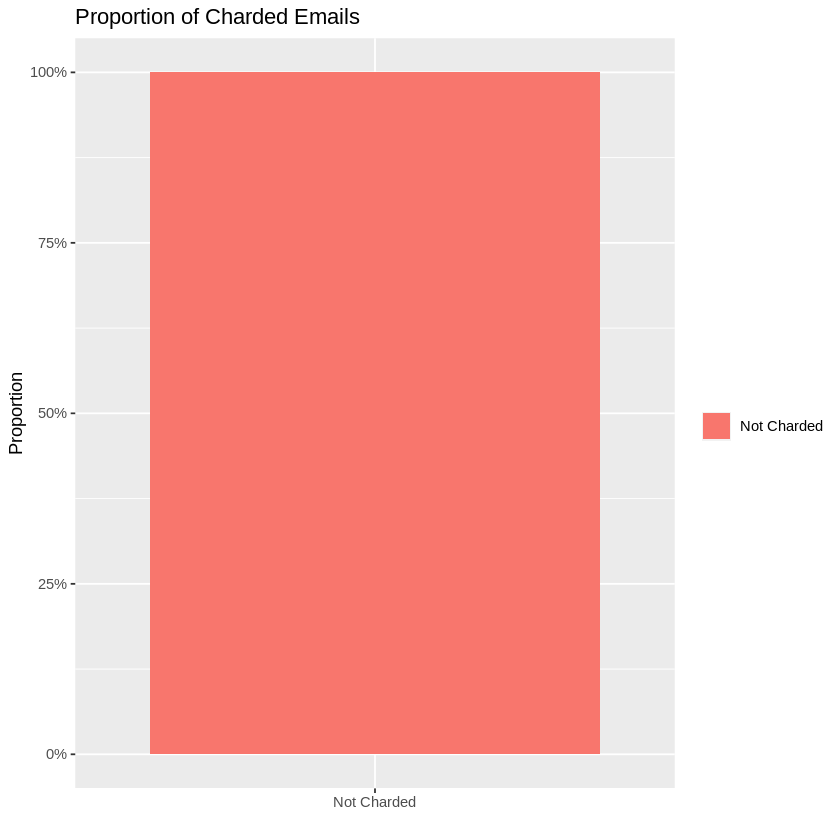

In [ ]:
email_data %>%
  ggplot(aes(x = chard, fill = chard)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Proportion of Charded Emails", y = "Proportion", x = "", fill = "")

In [ ]:
email_data_grouped <- email_data %>%
  count(group, click) %>%
  group_by(group) %>%
  mutate(prop = n / sum(n))

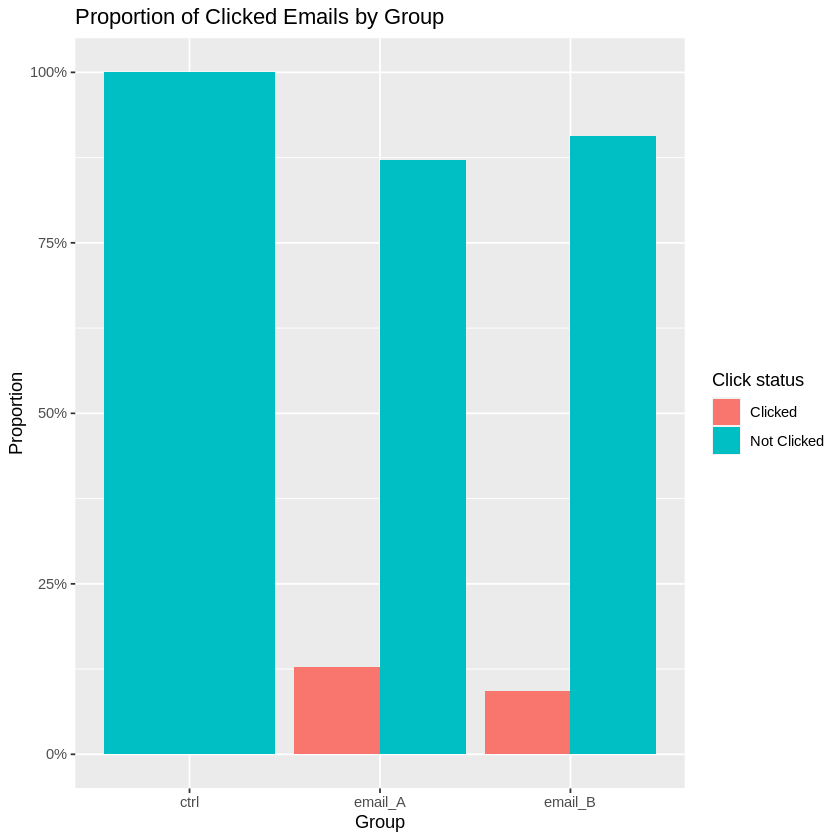

In [ ]:
ggplot(email_data_grouped, aes(x = group, y = prop, fill = click)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Proportion of Clicked Emails by Group", y = "Proportion", x = "Group", fill = "Click status")

In [ ]:
email_data_grouped <- email_data %>%
  count(group, open) %>%
  group_by(group) %>%
  mutate(prop = n / sum(n))


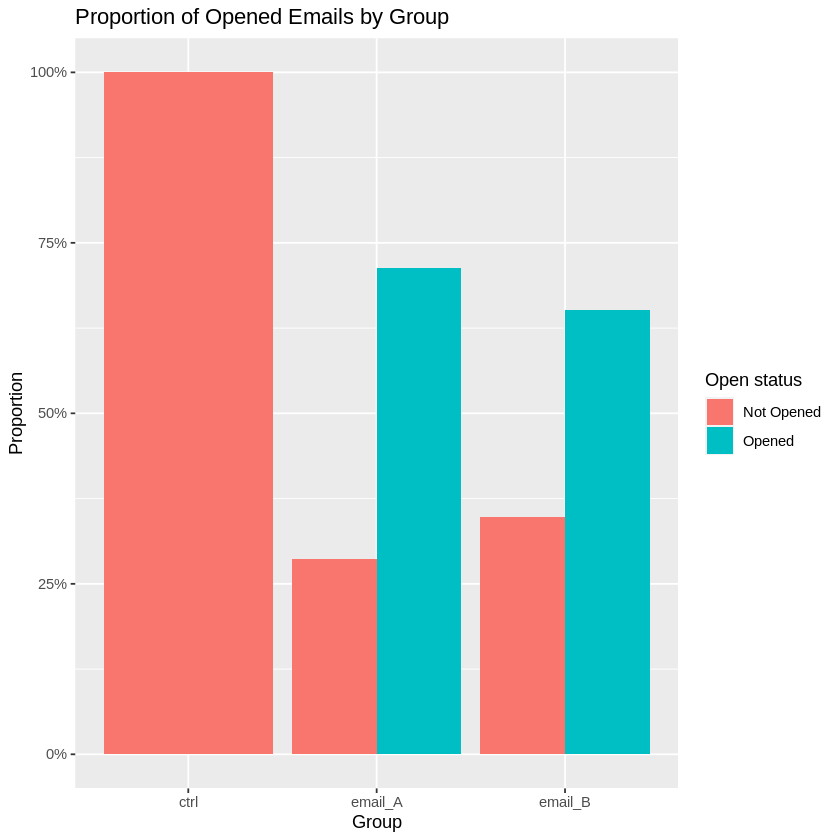

In [ ]:
ggplot(email_data_grouped, aes(x = group, y = prop, fill = open)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Proportion of Opened Emails by Group", y = "Proportion", x = "Group", fill = "Open status")

### Hypothesis Testing

> The alternative hypothesis and null hypothesis are types of conjectures used in statistical tests, which are formal methods of reaching conclusions or making judgments on the basis of data. In statistical hypothesis testing, the null hypothesis and alternative hypothesis are two mutually exclusive statements.

> "The statement being tested in a test of statistical significance is called the null hypothesis. The test of significance is designed to assess the strength of the evidence against the null hypothesis. Usually, the null hypothesis is a statement of 'no effect' or 'no difference'."[2] Null hypothesis is often denoted as H0.

> The statement that is being tested against the null hypothesis is the alternative hypothesis[2]. Alternative hypothesis is often denoted as $H_a$ or $H_1$.

> In statistical hypothesis testing, to prove the alternative hypothesis is true, it should be shown that the data is contradictory to the null hypothesis. Namely, there is sufficient evidence against null hypothesis to demonstrate that the alternative hypothesis is true. -- from [wikipedia](https://en.wikipedia.org/wiki/Alternative_hypothesis)

In [ ]:
clicks <- c(400, 410)         #number of clicks by version
totals <- c(500, 500)         #number of total visits to site
prop.test(clicks, totals)     #test for difference in proportions


	2-sample test for equality of proportions with continuity correction

data:  clicks out of totals
X-squared = 0.52632, df = 1, p-value = 0.4682
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07061343  0.03061343
sample estimates:
prop 1 prop 2 
  0.80   0.82 


In [ ]:
res1 <- prop.test(clicks, totals)
res1


	2-sample test for equality of proportions with continuity correction

data:  clicks out of totals
X-squared = 0.52632, df = 1, p-value = 0.4682
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07061343  0.03061343
sample estimates:
prop 1 prop 2 
  0.80   0.82 


**Version 2**

| page | click  | total |
| ------ | ------- | ----- |
| Old | 300 | 500 |
| New | 450 | 500 |

In [ ]:
clicks2 <- c(300, 450)        #number of clicks by version
totals <- c(500, 500)         #number of total visits to site
prop.test(clicks2, totals)    #testing the difference


	2-sample test for equality of proportions with continuity correction

data:  clicks2 out of totals
X-squared = 118.41, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.3523524 -0.2476476
sample estimates:
prop 1 prop 2 
   0.6    0.9 


In [ ]:
#extract specific elements
results <- prop.test(clicks2, totals)

In [ ]:
##cnfidence intervals
results$conf.int

[1] -0.3523524 -0.2476476
attr(,"conf.level")
[1] 0.95

#### Example: Product Recommendations

| page | click  | total |
| ------ | ------- | ----- |
| Old Algorithm | 420 | 1000 |
| New Algorithm | 510 | 1000 |

In [ ]:
#example 2 -- recommended product algorithms
clicks3 <- c(420, 510)        #number of clicks by version
totals3 <- c(1000, 1000)         #number of total visits to site
prop.test(clicks3, totals3)
#We reject the null hypothesis if it is smaller than a certain threshhold


	2-sample test for equality of proportions with continuity correction

data:  clicks3 out of totals3
X-squared = 15.92, df = 1, p-value = 6.608e-05
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.13454033 -0.04545967
sample estimates:
prop 1 prop 2 
  0.42   0.51 


**Instagram Advertising**

In [ ]:
#creating a dataframe
#creating a dataframe
group <- c('women', 'men')
clicks <- c(328, 234)
totals <- c(537, 532)
insta <- data.frame(group, clicks, totals)
insta

group,clicks,totals
<chr>,<dbl>,<dbl>
women,328,537
men,234,532


In [ ]:
#proportion test
prop.test(clicks, totals)
##We reject the null hypothsis


	2-sample test for equality of proportions with continuity correction

data:  clicks out of totals
X-squared = 30.641, df = 1, p-value = 3.104e-08
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1100917 0.2318105
sample estimates:
   prop 1    prop 2 
0.6108007 0.4398496 


#### Example 2: Wine Sales Data

Typically, rather than having a total count example we are provided a dataframe that contains the variable of interest alongside additional data on the customer or transaction.

In [ ]:
#email data
email_data %>%
  group_by(group) %>%
    summarise(mean(open))


emailed <- email_data[email_data$group != 'ctrl',]
head(emailed)

group,mean(open)
<chr>,<dbl>
ctrl,0.0000000
email_A,0.7133675
email_B,0.6516269


user_id,cpgn_id,group,email,open,click,purch,chard,sav_blanc,syrah,cab,past_purch,days_since,visits
<dbl>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1058220,1901Email,email_B,TRUE,0,0,0.00,0.00,0,0.00,0.00,0.00,289,4
1100384,1901Email,email_A,TRUE,0,0,88.00,0.00,0,0.00,0.00,0.00,187,4
1065703,1901Email,email_A,TRUE,1,0,18.41,146.13,0,0.00,15.81,161.94,76,6
1097281,1901Email,email_A,TRUE,1,0,0.00,0.00,0,24.48,102.39,126.87,103,6
1010272,1901Email,email_A,TRUE,1,0,0.00,112.08,0,0.00,0.00,112.08,219,5
1098389,1901Email,email_A,TRUE,1,0,0.00,0.00,0,309.69,0.00,309.69,204,7


In [ ]:
#calculate proportions in each group
ctabs <- xtabs(~group + open, data = emailed)
prop.test(ctabs)
#Null hypothesis assumes there is no difference
#we can look at p value ot conf interval
#If the p-value is less than or equal to the specified significance level α, the null hypothesis is rejected; otherwise, the null hypothesis is not rejected
#So can we  always conclude the rejecting of H0 with confidence interval ? like the zero being included or not ?  we might be  just lucky to get a confidence interval such that zero is not included in it?


	2-sample test for equality of proportions with continuity correction

data:  ctabs
X-squared = 108.6, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07338831 -0.05009297
sample estimates:
   prop 1    prop 2 
0.2866325 0.3483731 


In [ ]:
###limit data to only those emailed
ctab2 <- xtabs(~group + click, data = emailed)

prop.test(ctab2)


	2-sample test for equality of proportions with continuity correction

data:  ctab2
X-squared = 78.033, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04314090 -0.02737724
sample estimates:
   prop 1    prop 2 
0.8718575 0.9071165 


In [ ]:
#use xtabs to cross-tabulate email groups and open
#data with successes as first column and failures as second



In [ ]:
#run test on proportions



In [ ]:
#clicks by email



What would your final recommendations based on this experiment be?

#### Differences in Means

Rather than comparing a column of binary variables we may be interested in comparing continuous values in columns.  We can again look at numeric summaries using the `group_by` function and perform a hypothesis test using the `t.test` function.

In [ ]:
#average purchase
head(emailed)
emailed %>%
  group_by(group) %>%
    summarise(mean(purch))

user_id,cpgn_id,group,email,open,click,purch,chard,sav_blanc,syrah,cab,past_purch,days_since,visits
<dbl>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1058220,1901Email,email_B,TRUE,0,0,0.00,0.00,0,0.00,0.00,0.00,289,4
1100384,1901Email,email_A,TRUE,0,0,88.00,0.00,0,0.00,0.00,0.00,187,4
1065703,1901Email,email_A,TRUE,1,0,18.41,146.13,0,0.00,15.81,161.94,76,6
1097281,1901Email,email_A,TRUE,1,0,0.00,0.00,0,24.48,102.39,126.87,103,6
1010272,1901Email,email_A,TRUE,1,0,0.00,112.08,0,0.00,0.00,112.08,219,5
1098389,1901Email,email_A,TRUE,1,0,0.00,0.00,0,309.69,0.00,309.69,204,7


group,mean(purch)
<chr>,<dbl>
email_A,24.63317
email_B,25.99362


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 15550 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 15550 rows containing non-finite values (`stat_ydensity()`).”


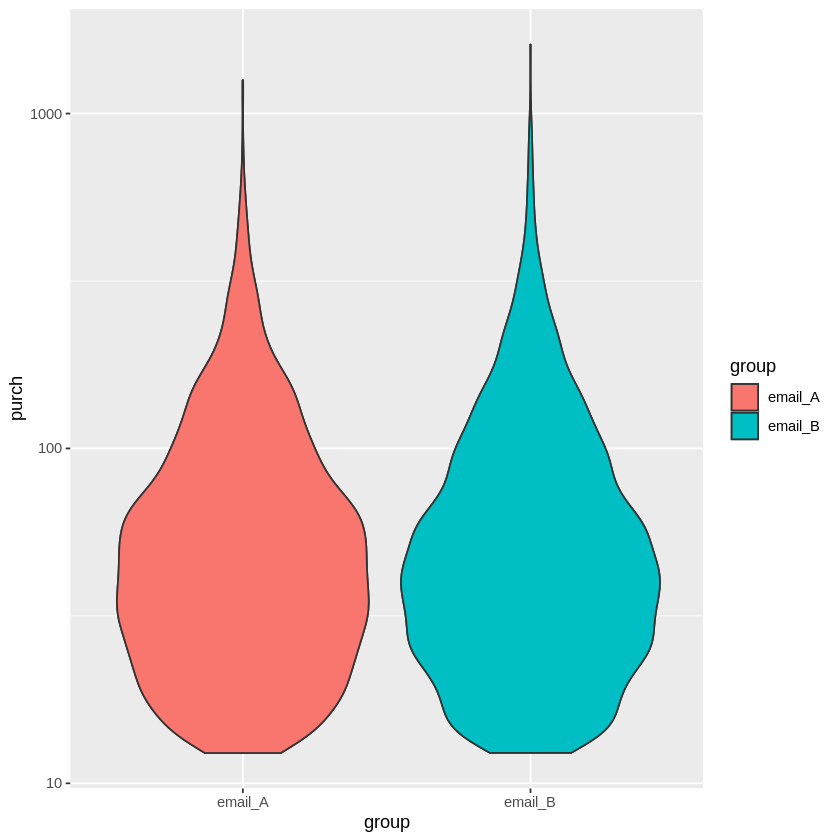

In [ ]:
#violin plot of log purchases
ggplot (emailed, aes(x=group, y=purch, fill = group))+
  geom_violin()+
  scale_y_log10()

In [ ]:
#t.test
t.test(purch ~ group, data = emailed)


	Welch Two Sample t-test

data:  purch by group
t = -1.8429, df = 24568, p-value = 0.06536
alternative hypothesis: true difference in means between group email_A and group email_B is not equal to 0
95 percent confidence interval:
 -2.80739713  0.08648704
sample estimates:
mean in group email_A mean in group email_B 
             24.63317              25.99362 


**PROBLEM**: Reading protocol

In [ ]:
#read in and inspect
reading_data <- read_csv("reading_protocol.csv")


Rows: 44 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): group
dbl (3): id, g, drp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
#group summaries
head(reading_data)

id,group,g,drp
<dbl>,<chr>,<dbl>,<dbl>
1,Treat,0,24
2,Treat,0,56
3,Treat,0,43
4,Treat,0,59
5,Treat,0,58
6,Treat,0,52


In [ ]:
#t.test
reading_data %>%
  group_by(group) %>%
    summarise(mean(drp))

group,mean(drp)
<chr>,<dbl>
Control,41.52174
Treat,51.47619


In [ ]:
t.test(drp ~ group, data = reading_data)


	Welch Two Sample t-test

data:  drp by group
t = -2.3109, df = 37.855, p-value = 0.02638
alternative hypothesis: true difference in means between group Control and group Treat is not equal to 0
95 percent confidence interval:
 -18.67588  -1.23302
sample estimates:
mean in group Control   mean in group Treat 
             41.52174              51.47619 


#### Subscription Dataset

In [ ]:
#subscriber data
sub <- read_csv("subscriber_data.csv")


Rows: 300 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): gender, ownHome, subscribe, Segment
dbl (3): age, income, kids

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
#group summaries
sub %>%
  group_by(ownHome) %>%
    summarise(mean(income))

ownHome,mean(income)
<chr>,<dbl>
ownNo,47391.01
ownYes,54934.68


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


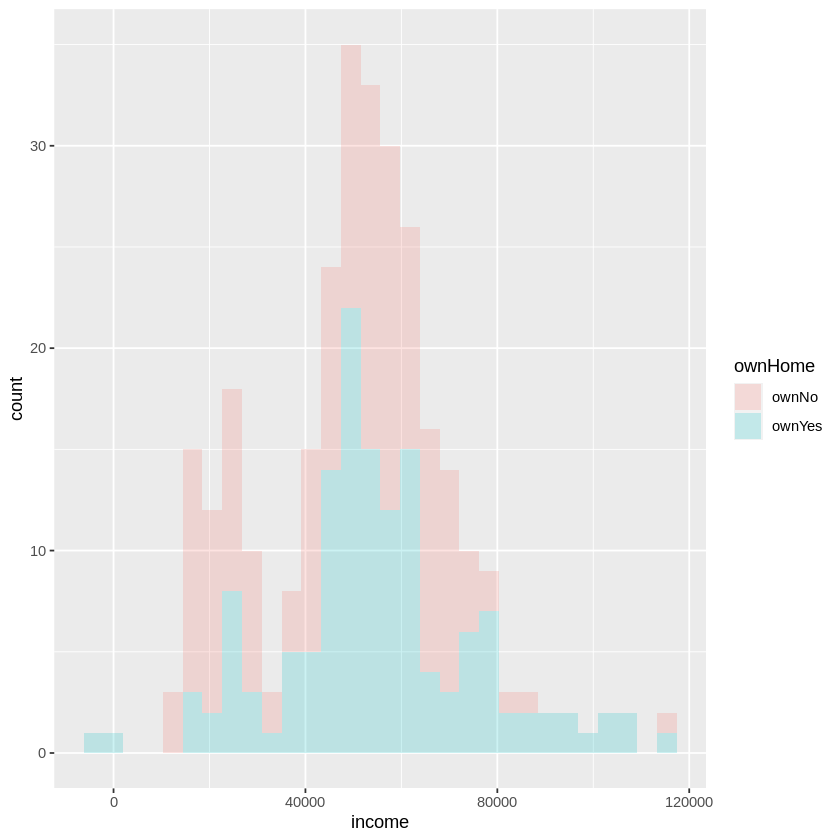

In [ ]:
#visualizations
ggplot(sub, aes(x= income, fill = ownHome)) +
  geom_histogram(alpha = 0.2)

In [ ]:
#hypothesis tests
t.test(income ~ ownHome, data = sub)
#t test actually print if there is a difference ort not


	Welch Two Sample t-test

data:  income by ownHome
t = -3.2731, df = 285.25, p-value = 0.001195
alternative hypothesis: true difference in means between group ownNo and group ownYes is not equal to 0
95 percent confidence interval:
 -12080.155  -3007.193
sample estimates:
 mean in group ownNo mean in group ownYes 
            47391.01             54934.68 


#### Logistic Model

Using other information to predict proportions aka binomial target.  Below, we create a logistic model to predict whether a customer will open the email.

The null hypothesis here is that past purchases do not effect whether someone opens the email.

In [ ]:
head(beaver1)

In [ ]:
#plot temperature vs. activity


In [ ]:
#build logistic model


In [ ]:
#summary


In [ ]:
#confint


#### Linear Regression

Now, the object predicted is continuous in nature -- similar to the example of a single observable variable and the difference in means.  We assume there is no relationship, test the significance of age on income.

In [ ]:
#age vs income


In [ ]:
#regression model


In [ ]:
#summarise


In [ ]:
#confidence interval


We interpret this confidence interval in a similar way -- we would expect a one year increase in age to effect income by somewhere in the 657.22 to 967.45 range.  This range does not include 0 -- but also helps to understand what values are possible rather than a single point value like the coefficient.